# FIFA 2022 Tweets
## Exploring Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/proj34/fifa_world_cup_2022_tweets.csv")
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [11]:
df["Sentiment"].value_counts().values

array([8489, 8251, 5784])

<BarContainer object of 3 artists>

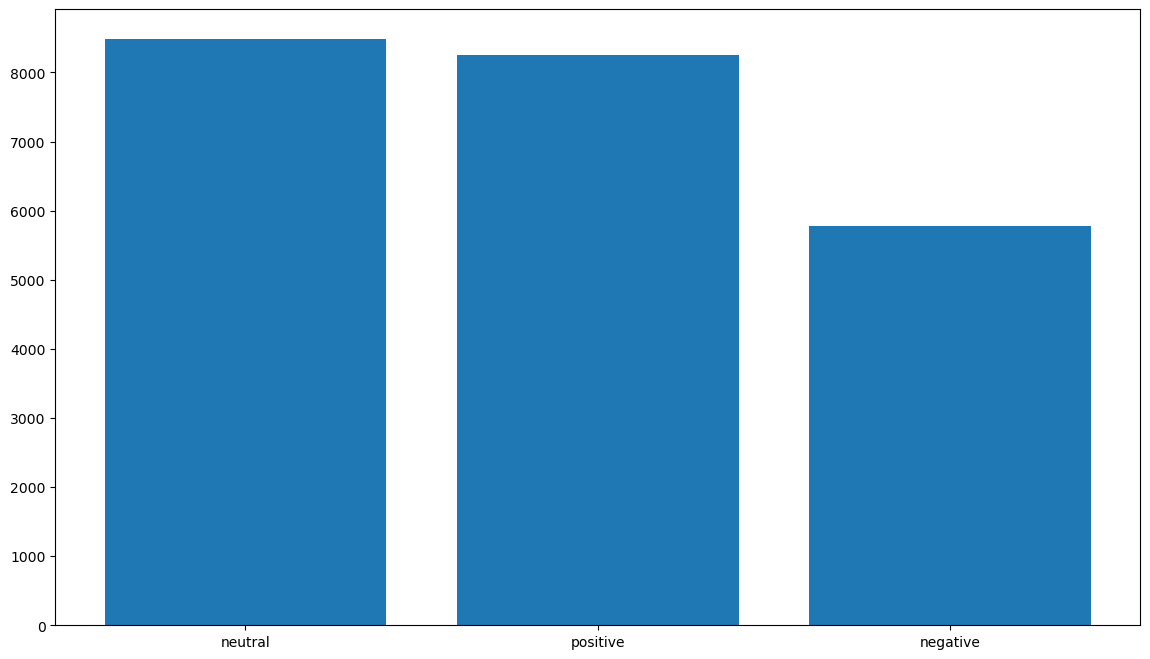

In [14]:
_, ax = plt.subplots(figsize=(14, 8))
ax.bar(df["Sentiment"].unique(), df["Sentiment"].value_counts().values)

<AxesSubplot:>

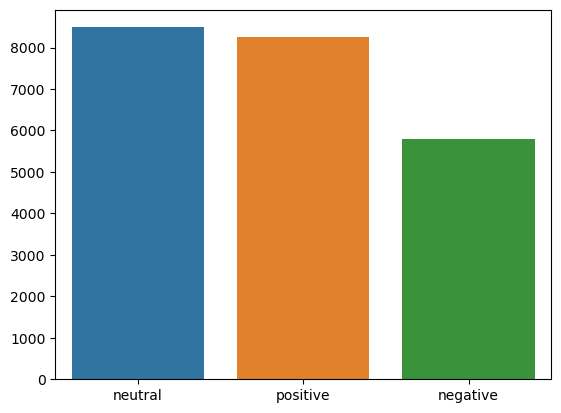

In [16]:
sns.barplot(x=df["Sentiment"].unique(), y=df["Sentiment"].value_counts().values)

## Cleaning Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22524 non-null  int64 
 1   Date Created     22524 non-null  object
 2   Number of Likes  22524 non-null  int64 
 3   Source of Tweet  22524 non-null  object
 4   Tweet            22524 non-null  object
 5   Sentiment        22524 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [18]:
df.isna().sum()

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64

In [21]:
df.drop(["Unnamed: 0", "Date Created", "Number of Likes", "Source of Tweet"], inplace=True, axis=1)

In [22]:
df.head()

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,neutral
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,Worth reading while watching #WorldCup2022 htt...,positive
3,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,"If the BBC cares so much about human rights, h...",negative


In [23]:
X = df["Tweet"]
y = df["Sentiment"]

## Preprocessing Data

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train_vect = cv.fit_transform(X_train.values)
X_test_vect  = cv.transform(X_test.values)

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(le.classes_)
y_test  = le.fit_transform(y_test)
le.classes_

['negative' 'neutral' 'positive']


array(['negative', 'neutral', 'positive'], dtype=object)

## Training a model

In [43]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_vect, y_train)

BernoulliNB()

In [44]:
bnb.score(X_test_vect, y_test)

0.7107658157602663

## Prediction

In [51]:
test = "I love football"

test = cv.transform([test])
test

<1x30323 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [52]:
bnb.predict(test)

array([2])